In [1]:
# COVID-19 Data Analysis Project

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# Step 2: Load the dataset
df = pd.read_csv("covid_19_clean_complete.csv")
print("✅ Data Loaded Successfully!")
print(df.head())

✅ Data Loaded Successfully!
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [2]:
# Step 3: Basic info
print("\n📊 Basic Dataset Info:")
print(df.info())
print("\n🧮 Missing Values:")
print(df.isnull().sum())


📊 Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None

🧮 Missing Values:
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dt

In [5]:
# Step 2: Drop unnecessary columns
df = df.drop(columns=['Lat', 'Long', 'WHO Region'])

# Step 3: Rename columns for consistency
df.rename(columns={
    'Date': 'ObservationDate'
}, inplace=True)

# Step 4: Convert dates to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Step 5: Handle missing data
df['Province/State'].fillna('Unknown', inplace=True)

# Step 6: Feature Engineering – Active Cases
# Recalculate Active in case you want to override existing column
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# Step 7: Latest summary per country
latest = df[df['ObservationDate'] == df['ObservationDate'].max()]
country_summary = latest.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Step 8: Top 10 countries by confirmed cases
top10 = country_summary.sort_values('Confirmed', ascending=False).head(10)

# Optional: Display top 10
print(top10)


     Country/Region  Confirmed  Deaths  Recovered   Active
173              US    4290259  148011    1325804  2816444
23           Brazil    2442375   87618    1846641   508116
79            India    1480073   33408     951166   495499
138          Russia     816680   13334     602249   201097
154    South Africa     452529    7067     274925   170537
111          Mexico     395489   44022     303810    47657
132            Peru     389717   18418     272547    98752
35            Chile     347923    9187     319954    18782
177  United Kingdom     301708   45844       1437   254427
81             Iran     293606   15912     255144    22550


/tmp/ipython-input-219018448.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province/State'].fillna('Unknown', inplace=True)


In [4]:
print(df.columns)
print(len(df.columns))


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
10


/tmp/ipython-input-304285966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top10, palette='coolwarm')


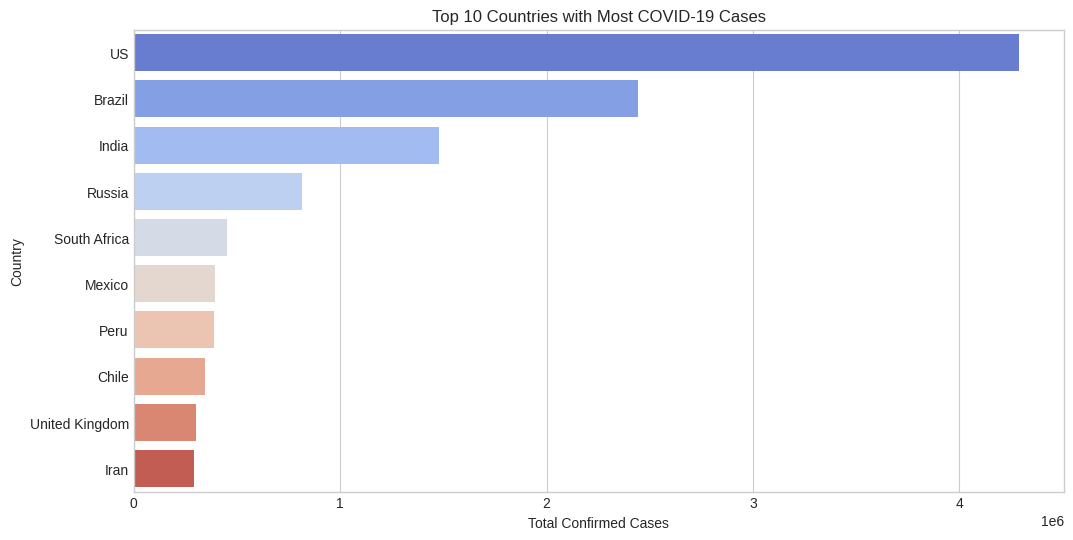

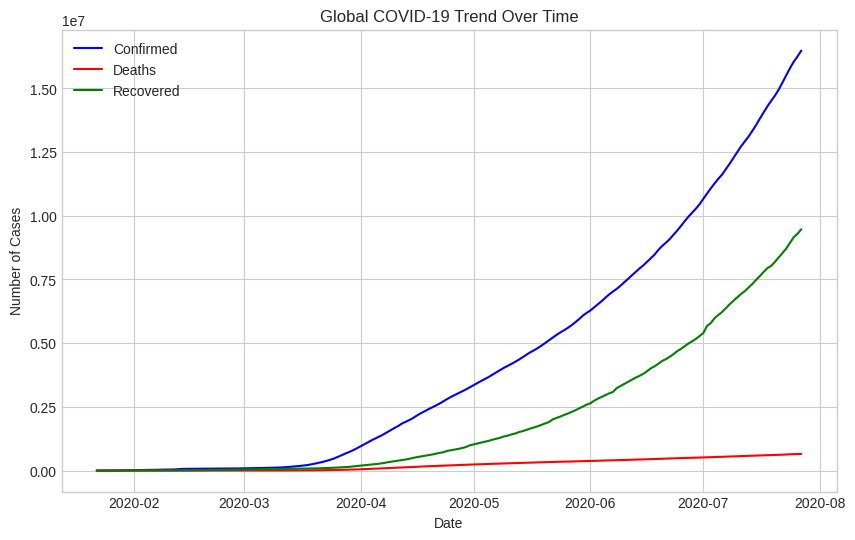

/tmp/ipython-input-304285966.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mortality Rate (%)', y='Country/Region', data=top10_mortality, palette='Reds')


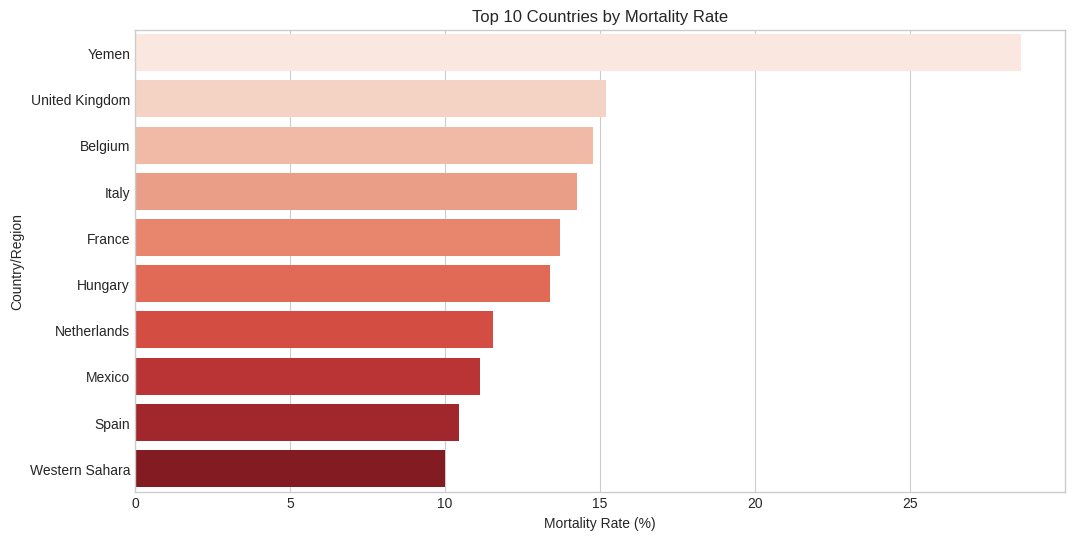

/tmp/ipython-input-304285966.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovery Rate (%)', y='Country/Region', data=top10_recovery, palette='Greens')


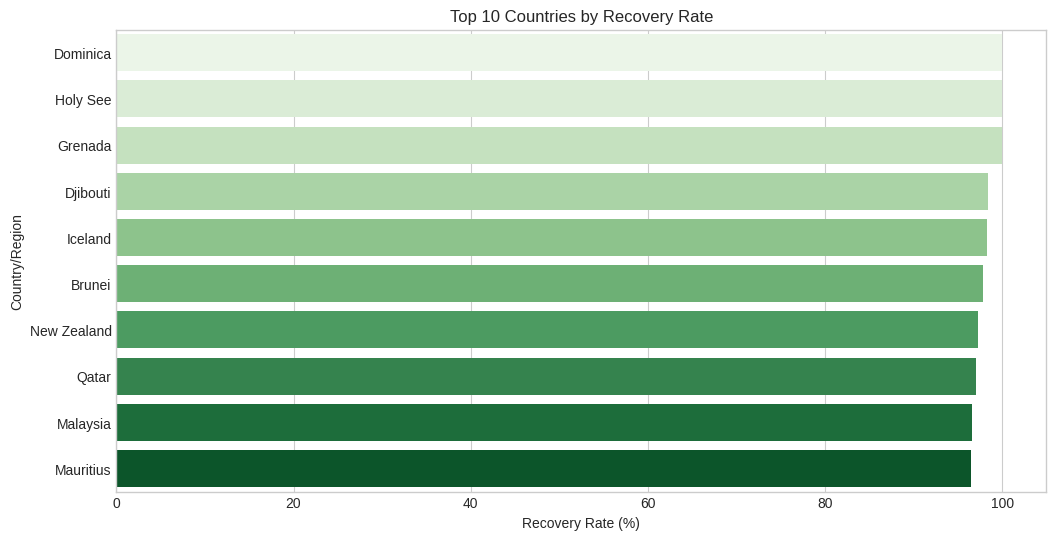


✅ Analysis Complete!


In [6]:
# Step 10: Visualization 1 – Top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y='Country/Region', data=top10, palette='coolwarm')
plt.title("Top 10 Countries with Most COVID-19 Cases")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.show()

# Step 11: Global trend over time
datewise = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(datewise['ObservationDate'], datewise['Confirmed'], label='Confirmed', color='blue')
plt.plot(datewise['ObservationDate'], datewise['Deaths'], label='Deaths', color='red')
plt.plot(datewise['ObservationDate'], datewise['Recovered'], label='Recovered', color='green')
plt.title('Global COVID-19 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# Step 12: Mortality and Recovery Rates
country_summary['Mortality Rate (%)'] = (country_summary['Deaths'] / country_summary['Confirmed']) * 100
country_summary['Recovery Rate (%)'] = (country_summary['Recovered'] / country_summary['Confirmed']) * 100

# Step 13: Visualization 2 – Mortality Rate (Top 10)
top10_mortality = country_summary.sort_values('Mortality Rate (%)', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Mortality Rate (%)', y='Country/Region', data=top10_mortality, palette='Reds')
plt.title('Top 10 Countries by Mortality Rate')
plt.show()

# Step 14: Visualization 3 – Recovery Rate (Top 10)
top10_recovery = country_summary.sort_values('Recovery Rate (%)', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Recovery Rate (%)', y='Country/Region', data=top10_recovery, palette='Greens')
plt.title('Top 10 Countries by Recovery Rate')
plt.show()

print("\n✅ Analysis Complete!")
